Первая часть. 

Будем использовать датасет по мобильным телефонам и предсказывать ценовой сегмент телефона. 

Описание признаков:
1.	ID - уникальный ключ
2.	battery_power - Total energy a battery can store in one time measured in mAh
3.	blue - Has bluetooth or not
4.	clock_speed - speed at which microprocessor executes instructions
5.	dual_sim - Has dual sim support or not
6.	fc - Front Camera mega pixels
7.	four_g - Has 4G or not
8.	int_memory - Internal Memory in Gigabytes
9.	m_dep - Mobile Depth in cm
10.	mobile_wt - Weight of mobile phone
11.	n_cores - Number of cores of processor
12.	pc - Primary Camera mega pixels
13.	px_height - Pixel Resolution Height
14.	px_width - Pixel Resolution Width
15.	ram - Random Access Memory in Megabytes
16.	sc_h - Screen Height of mobile in cm
17.	sc_w -  Screen Width of mobile in cm
18.	talk_time - longest time that a single battery charge will last when you are
19.	three_g - Has 3G or not
20.	touch_screen - Has touch screen or not
21.	wifi - Has wifi or not
22.	price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Датасет не разделен на части, это необходимо сделать вам
https://drive.google.com/file/d/1XkKOS6jbke3JYWTj8V_xS46txe820rZ_/view?usp=sharing

Что нужно сделать:
1.	Реализовать загрузку (желательно по ссылке) и анализ данных, сделать EDA
2.	Сделать необходимую предварительную обработку, при необходимости можно сделать feature engineering
3.	Выбрать метрики для оценки качества моделей и аргументировать их
4.	Построить базовую модель - Логистическую регрессию и оценить ее, проанализировать важность признаков
5.	Осуществить подбор гипер-параметров для модели логистической регрессии. Оценить изменение метрик и важности признаков
6.	Постройте модель из библиотеки lightgbm - LGBMClassifier, и также оцените ее
7.	Опишите какие гипер-параметры есть у бустинга над решающими деревьями, и подберите лучшие для классификатора из пунта 6. Подбирать, например, можно при помощи lightgbm.cv, но окончательную тактику выбираете вы. Оцените модель выбранными метриками.
8.	Проанализируйте важность признаков модели бустинга. Какие признаки похожи по важности с линейной моделью? Какие отличаются? Почему так может быть?
9.	Приведите примеры хороших предсказаний при помощи бустинга, приведи примеры плохих. 
10.	Как изменились метрики? Проанализируйте итоговые значения для всех моделей.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from yellowbrick.model_selection import FeatureImportances
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier

**1.	Реализовать загрузку (желательно по ссылке) и анализ данных, сделать EDA**

In [3]:
sharing_url = "https://drive.google.com/file/d/1XkKOS6jbke3JYWTj8V_xS46txe820rZ_/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.shape

(2000, 21)

In [8]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(2000, 21)

<Axes: >

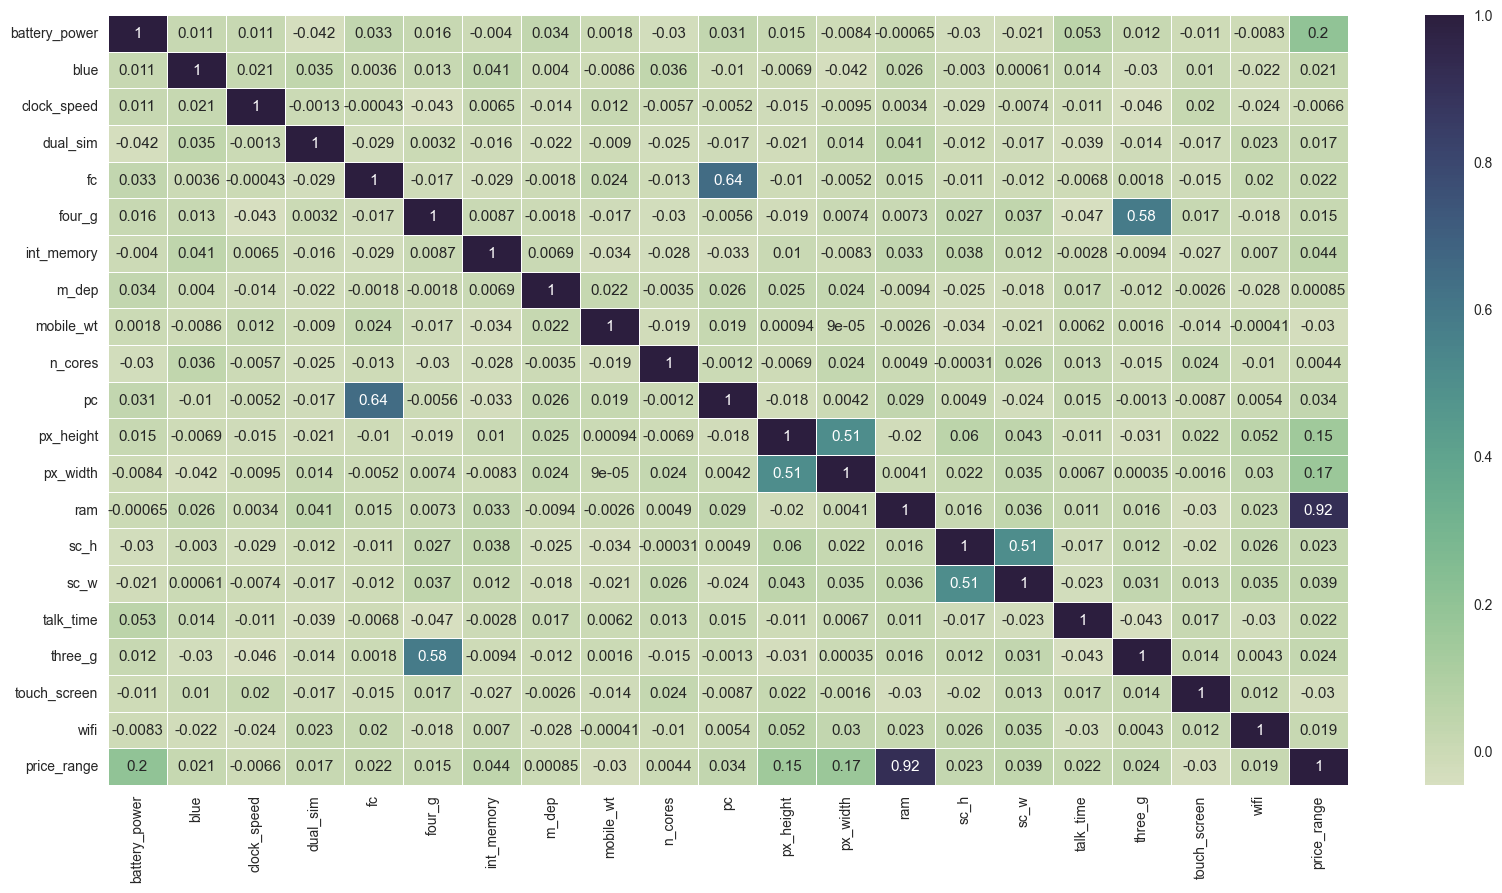

In [9]:
corr = df.corr()

plt.figure(figsize=(20,10))

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(corr, linewidths=.5, cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), annot=True,annot_kws={"size": 11})

*Видим корреляцию между screen height - screen width; pixel height - pixel width; primary camera - frontal camera; 3G - 4G internet*

	sc_h - Screen Height of mobile in cm
	sc_w -  Screen Width of mobile in cm

In [10]:
df['sc_d'] = np.sqrt(df['sc_h']**2 + df['sc_w']**2)

<Axes: >

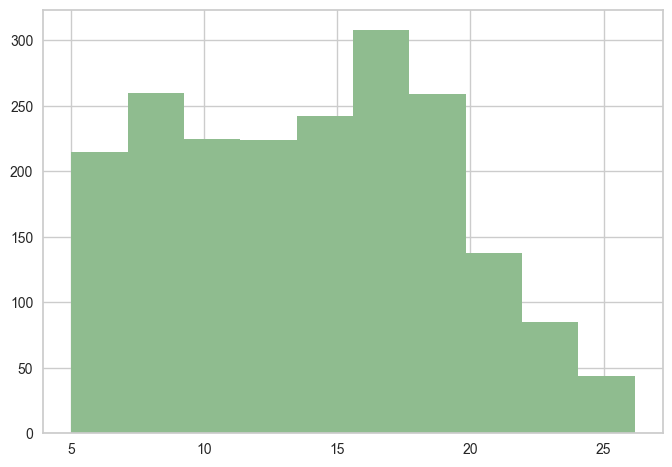

In [11]:
df['sc_d'].hist(color='darkseagreen')

	px_height - Pixel Resolution Height
	px_width - Pixel Resolution Width

In [12]:
df['px_area'] = df['px_height']*df['px_width']

<Axes: >

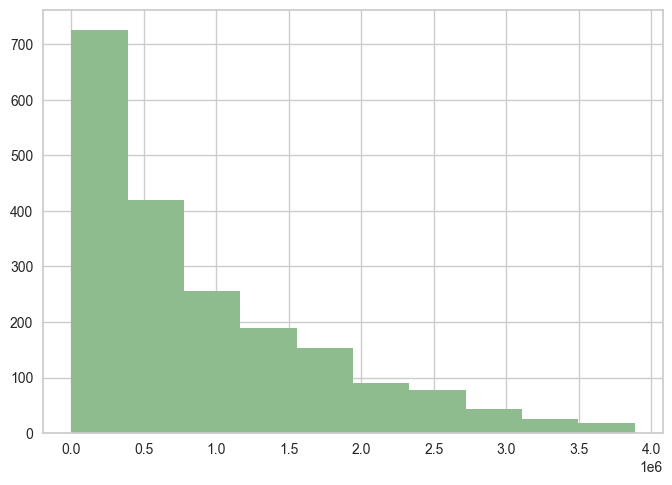

In [13]:
df['px_area'].hist(color='darkseagreen')

	fc - Front Camera mega pixels
	pc - Primary Camera mega pixels

In [14]:
df['cam_avg'] = (df['fc']+df['pc'])/2

<Axes: >

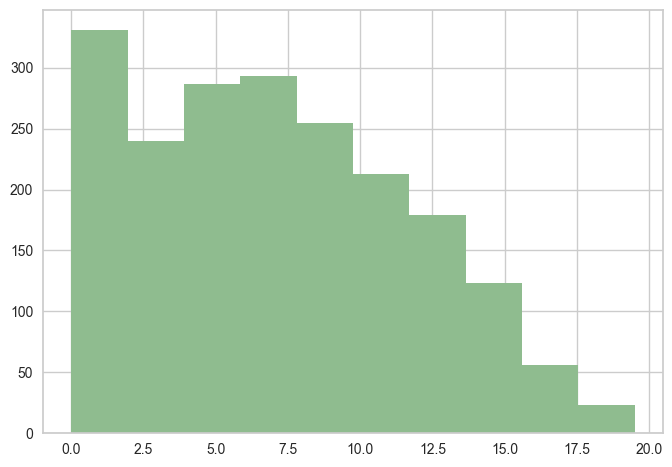

In [15]:
df['cam_avg'].hist(color='darkseagreen')

	four_g - Has 4G or not
	three_g - Has 3G or not

In [16]:
df['any_g'] = (df['four_g']+df['three_g'])
df.loc[df['any_g'] == 2, 'any_g'] = 1

<Axes: >

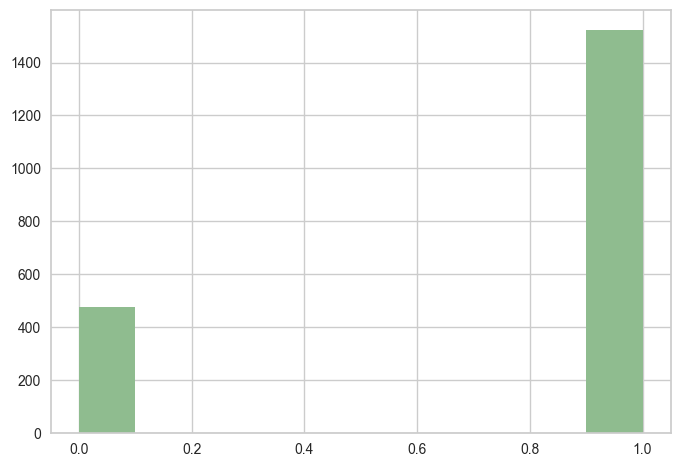

In [17]:
df['any_g'].hist(color='darkseagreen')

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>,
        <Axes: title={'center': 'sc_d'}>,
        

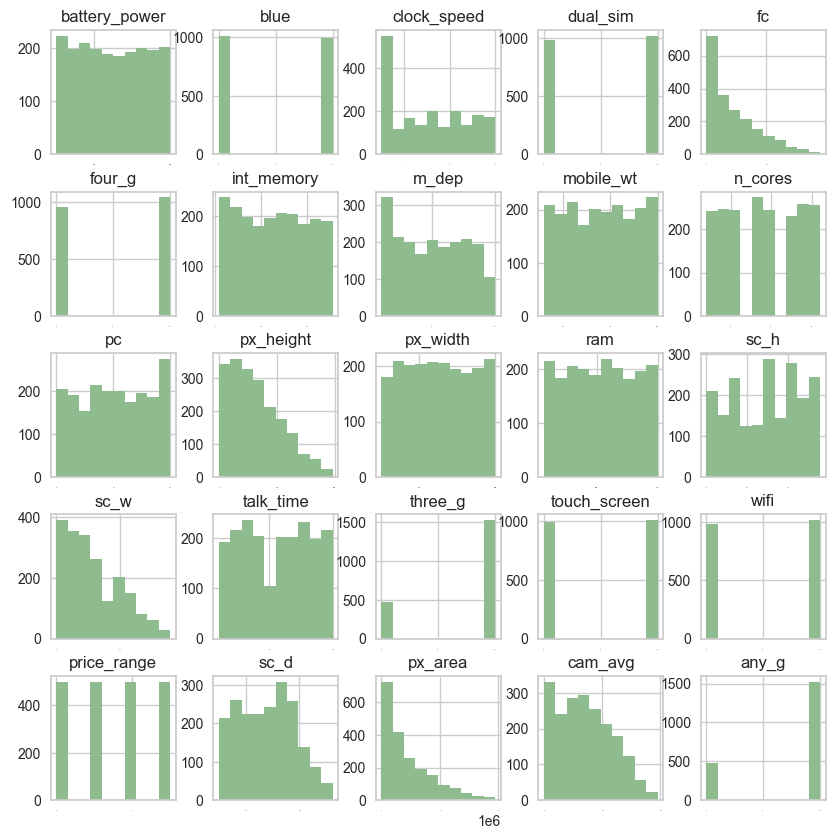

In [18]:
df.hist(bins=10, xlabelsize = 0.1, figsize = (10, 10), color='darkseagreen')

In [19]:
X = df.drop(['price_range'], axis = 1)

In [20]:
y = df['price_range']

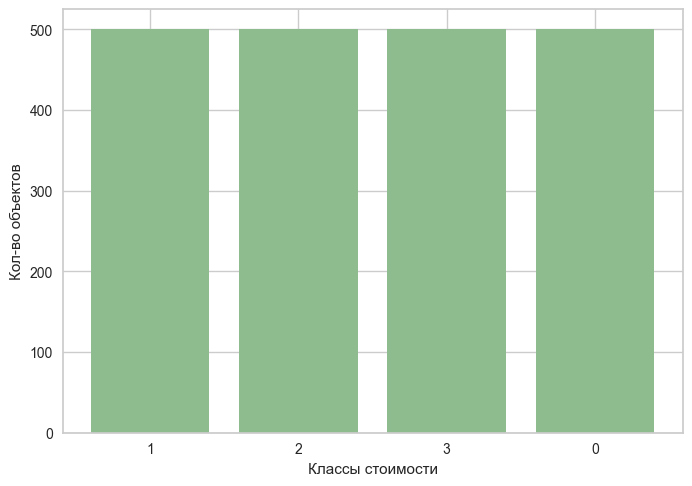

In [21]:
classes = y.value_counts().index.astype(str)
num_of_objects = y.value_counts()

plt.bar(classes, num_of_objects, color='darkseagreen')
plt.xlabel('Классы стоимости')
plt.ylabel('Кол-во объектов')
plt.show()

In [ ]:
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pandas_columns = X_train.columns
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=pandas_columns)
X_test = pd.DataFrame(X_test, columns=pandas_columns)

In [23]:
reg = LogisticRegression()
model = reg.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.95      0.98      0.96        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



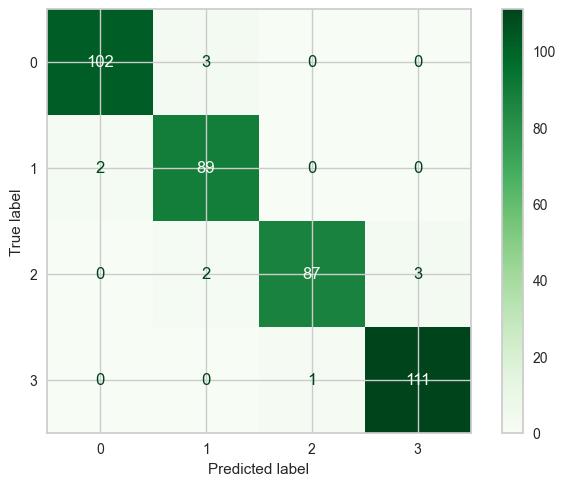

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


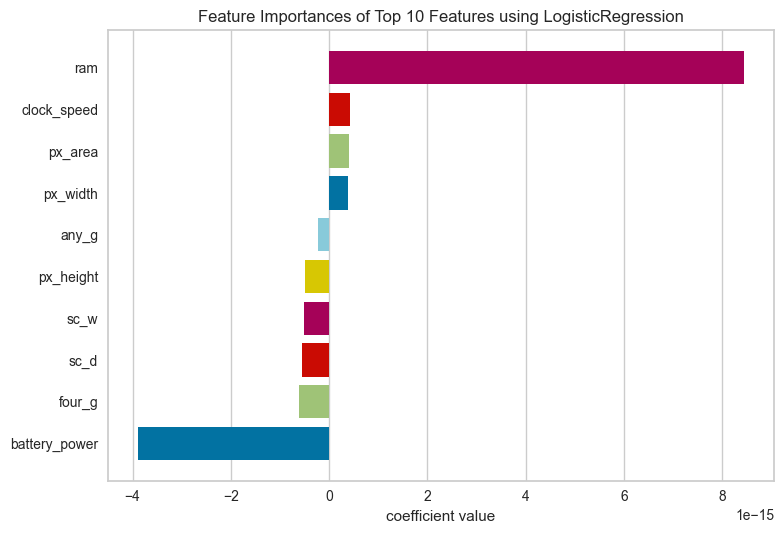

<Axes: title={'center': 'Feature Importances of Top 10 Features using LogisticRegression'}, xlabel='coefficient value'>

In [26]:
viz0 = FeatureImportances(model, topn=10, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

In [27]:
from sklearn.model_selection import GridSearchCV  

param_grid = {'penalty': ['l2'], 'C': [0.1, 1, 10, 100], 'class_weight': [None, 'balanced', {0: 1, 1: 10}]}

grid_search = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv=5,
                           error_score='raise'
                           )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced', {0: 1, 1: 10}],
                         'penalty': ['l2']},
             scoring='accuracy')

In [28]:
print (grid_search.best_score_)
print (grid_search.best_params_)
print(grid_search.best_estimator_)

0.9643749999999999
{'C': 100, 'class_weight': None, 'penalty': 'l2'}
LogisticRegression(C=100)


In [29]:
best_model = grid_search.best_estimator_

In [30]:
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.93      1.00      0.96        91
           2       0.99      0.96      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



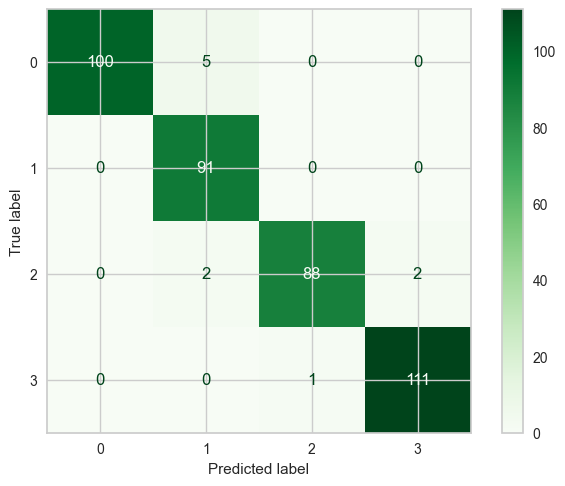

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


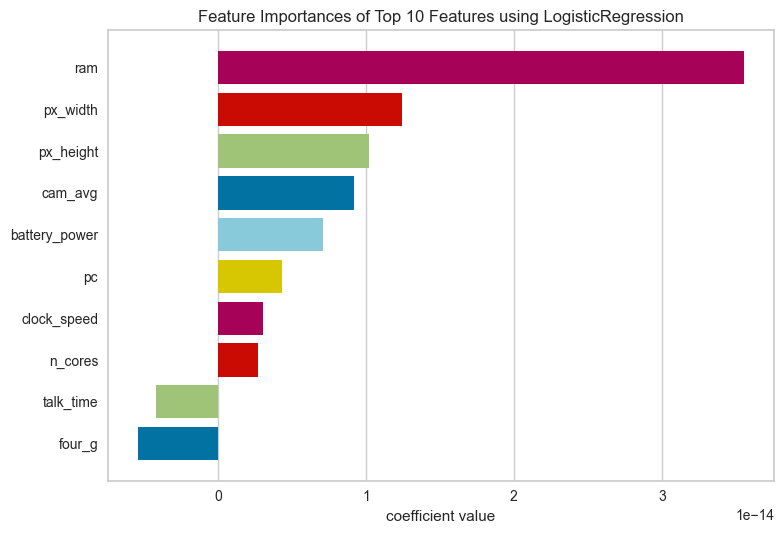

<Axes: title={'center': 'Feature Importances of Top 10 Features using LogisticRegression'}, xlabel='coefficient value'>

In [32]:
viz0 = FeatureImportances(best_model, topn=10, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

In [ ]:
lgbm = LGBMClassifier(class_weight='balanced', max_depth=-1, n_jobs=4, num_iterations = 100)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 24
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       105
           1       0.83      0.95      0.89        91
           2       0.83      0.83      0.83        92
           3       0.93      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0

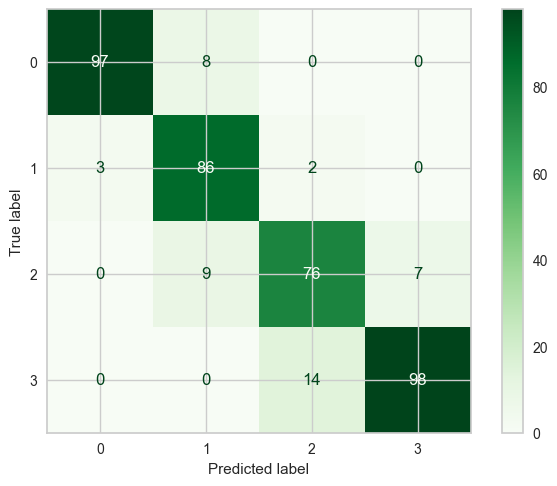

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


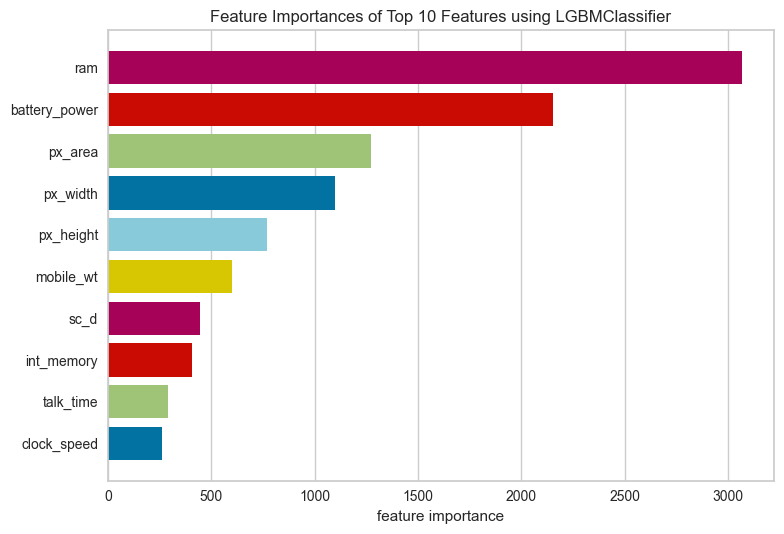

<Axes: title={'center': 'Feature Importances of Top 10 Features using LGBMClassifier'}, xlabel='feature importance'>

In [62]:
viz0 = FeatureImportances(lgbm, topn=10, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

In [ ]:
param_distributions ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                    'num_leaves': range(5, 20), 
                    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}

new_lgbm = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_distributions, 
    scoring='accuracy',
    cv=3)

new_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 1066, number of used features: 24
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(class_weight='balanced', n_jobs=4,
                                            num_iterations=100),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': range(5, 20)},
                   scoring='accuracy')

In [64]:
y_pred = new_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.85      0.93      0.89        91
           2       0.88      0.82      0.85        92
           3       0.94      0.93      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



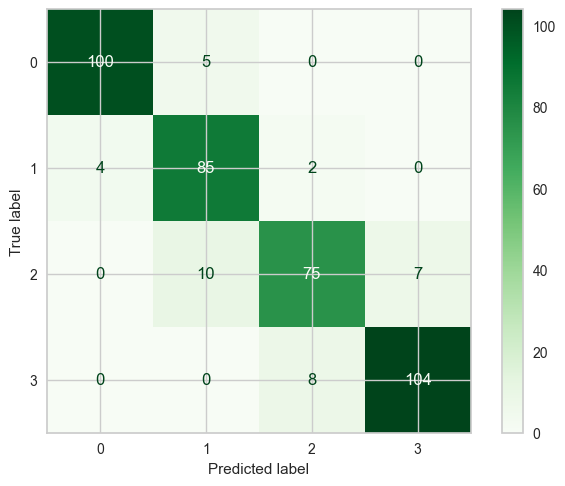

In [65]:
cm = confusion_matrix(y_test, y_pred, labels=new_lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=new_lgbm.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


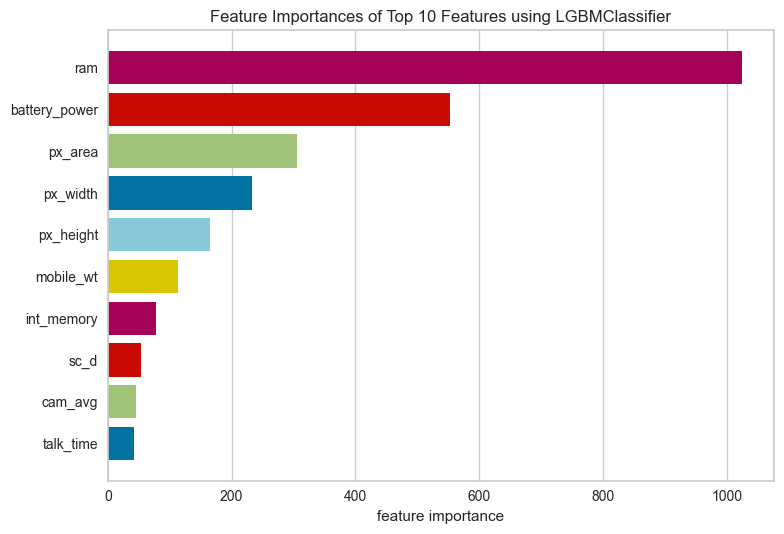

<Axes: title={'center': 'Feature Importances of Top 10 Features using LGBMClassifier'}, xlabel='feature importance'>

In [66]:
best_lgbm = new_lgbm.best_estimator_

viz0 = FeatureImportances(best_lgbm, topn=10, relative=False)
viz0.fit(X_train, y_train)
viz0.show()


Вторая часть

Будем предсказывать по показателям датчиков наличие возгорания в помещении

Датасет не разделен на части, это необходимо сделать вам
https://drive.google.com/file/d/1TJI9IVaZQtaTJUezLrC3WaQ-eEC40AGG/view?usp=sharing

Описание признаков:

1.	index - id записи
2.	UTC - время создания записи
3.	Temperature[C] - Air Temperature
4.	Humidity[%] - Air Humidity
5.	TVOC[ppb] - otal Volatile Organic Compounds; measured in parts per billion
6.	eCO2[ppm] - co2 equivalent concentration; calculated from different values like TVCO
7.	Raw H2 - raw molecular hydrogen; not compensated (Bias, temperature, etc.)
8.	Raw Ethanol -  raw ethanol gas
9.	Pressure[hPa] - Air Pressure 
10.	PM1.0 - particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
11.	PM2.5 - particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
12.	NC0.5 - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
13.	NC1.0 - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
14.	NC2.5 - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
15.	CNT - номер записи
16.	Fire - Alarmground truth is "1" if a fire is there

Что нужно сделать:
11.	Реализовать загрузку (желательно по ссылке) и анализ данных, сделать EDA
12.	Сделать необходимую предварительную обработку, при необходимости можно сделать feature engineering
13.	Выбрать метрики для оценки качества моделей и аргументировать их
14.	Построить базовую модель - Логистическую регрессию и оценить ее, проанализировать важность признаков, подобрать отсечку для принятия решения
15.	Осуществить подбор гипер-параметров для модели логистической регрессии. Оценить изменение метрик и важности признаков
16.	Постройте модель из библиотеки lightgbm - LGBMClassifier, и также оцените ее, , подобрать отсечку для принятия решения
17.	Опишите какие гипер-параметры есть у бустинга над решающими деревьями, и подберите лучшие для классификатора из пунта 6. Подбирать, например, можно при помощи lightgbm.cv, но окончательную тактику выбираете вы. Оцените модель выбранными метриками.
18.	Проанализируйте важность признаков модели бустинга. Какие признаки похожи по важности с линейной моделью? Какие отличаются? Почему так может быть?
19.	Приведите примеры хороших предсказаний при помощи бустинга, приведи примеры плохих. 
20.	Как изменились метрики? Проанализируйте итоговые значения для всех моделей.

In [113]:
sharing_url = "https://drive.google.com/file/d/1TJI9IVaZQtaTJUezLrC3WaQ-eEC40AGG/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)

In [114]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [115]:
df.columns = df.columns.to_series().apply(lambda col: col.replace('[', '_').replace(']', ''))

In [116]:
df.head()

,Unnamed: 0,UTC,Temperature_C,Humidity_%,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     62630 non-null  int64  
 1   UTC            62630 non-null  int64  
 2   Temperature_C  62630 non-null  float64
 3   Humidity_%     62630 non-null  float64
 4   TVOC_ppb       62630 non-null  int64  
 5   eCO2_ppm       62630 non-null  int64  
 6   Raw H2         62630 non-null  int64  
 7   Raw Ethanol    62630 non-null  int64  
 8   Pressure_hPa   62630 non-null  float64
 9   PM1.0          62630 non-null  float64
 10  PM2.5          62630 non-null  float64
 11  NC0.5          62630 non-null  float64
 12  NC1.0          62630 non-null  float64
 13  NC2.5          62630 non-null  float64
 14  CNT            62630 non-null  int64  
 15  Fire Alarm     62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [118]:
df.describe()

,Unnamed: 0,UTC,Temperature_C,Humidity_%,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [119]:
df.shape

(62630, 16)

In [120]:
df = df.drop(['Unnamed: 0', 'CNT', 'UTC'], axis=1)
df = df.drop_duplicates()
df = df.dropna()
df.shape

(62628, 13)

<Axes: >

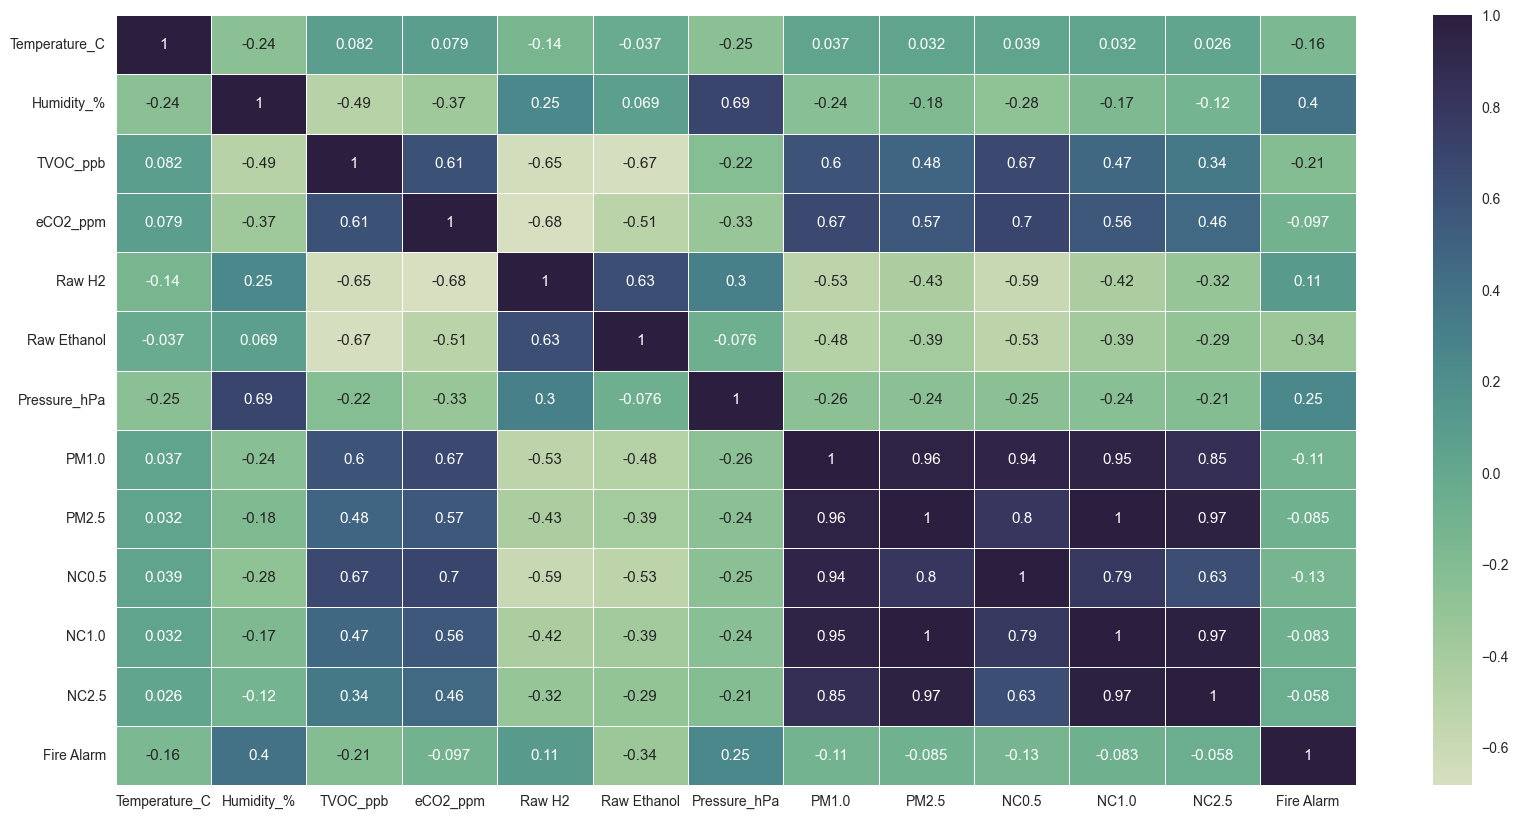

In [121]:
corr = df.corr()

plt.figure(figsize=(20,10))

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(corr, linewidths=.5, cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), annot=True,annot_kws={"size": 11})

In [122]:
df = df.drop('NC0.5', axis = 1)
df = df.drop(['PM1.0', 'NC1.0'], axis = 1)

Добавляем +1, чтобы не было деления на 0

In [123]:
df['NC_to_PM_2.5'] = (df['NC2.5']+1)/(df['PM2.5']+1)

In [124]:
df = df.drop(['PM2.5', 'NC2.5'], axis = 1)

<Axes: >

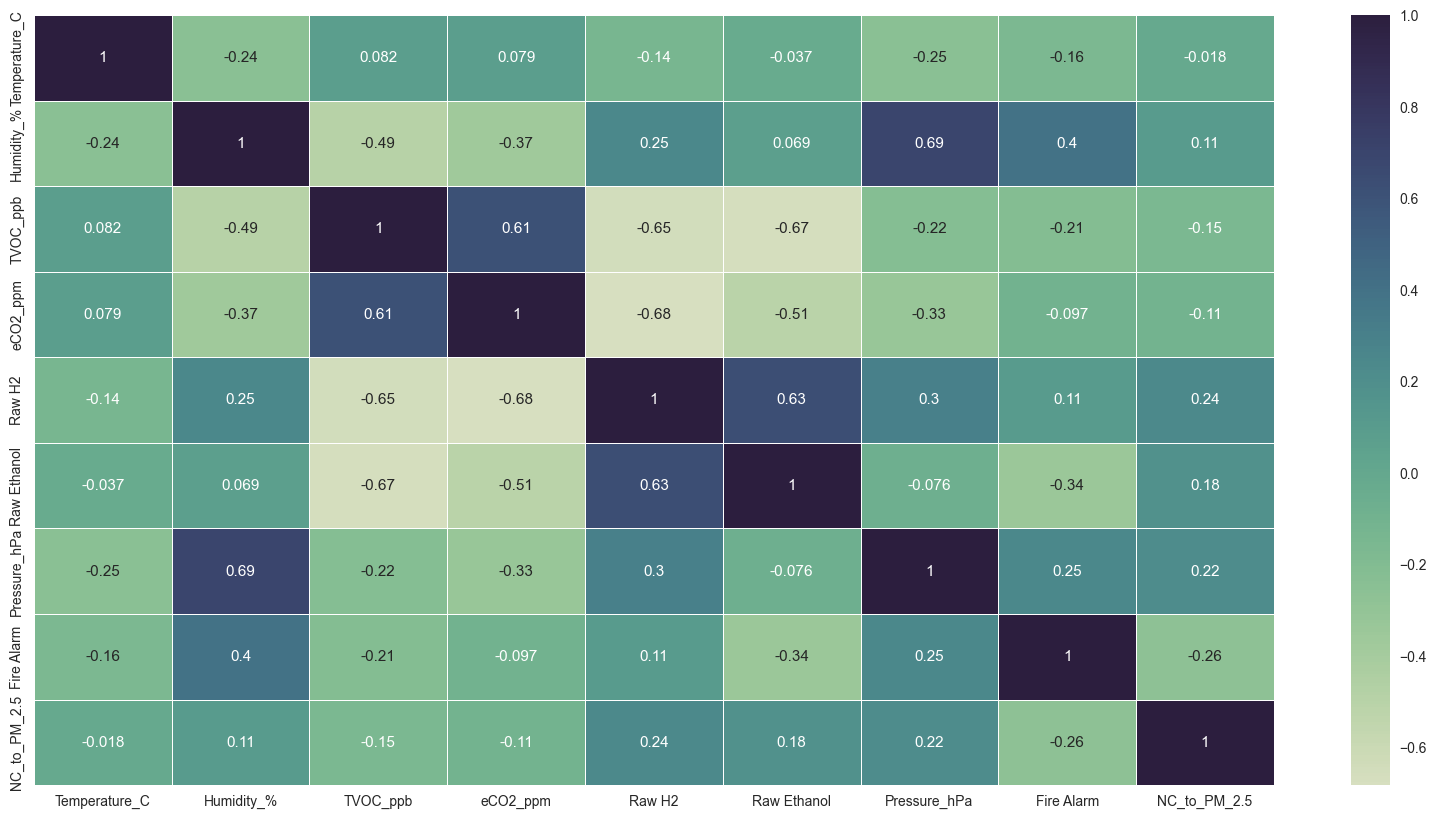

In [125]:
corr = df.corr()

plt.figure(figsize=(20,10))

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(corr, linewidths=.5, cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), annot=True,annot_kws={"size": 11})

array([[<Axes: title={'center': 'Temperature_C'}>,
        <Axes: title={'center': 'Humidity_%'}>,
        <Axes: title={'center': 'TVOC_ppb'}>],
       [<Axes: title={'center': 'eCO2_ppm'}>,
        <Axes: title={'center': 'Raw H2'}>,
        <Axes: title={'center': 'Raw Ethanol'}>],
       [<Axes: title={'center': 'Pressure_hPa'}>,
        <Axes: title={'center': 'Fire Alarm'}>,
        <Axes: title={'center': 'NC_to_PM_2.5'}>]], dtype=object)

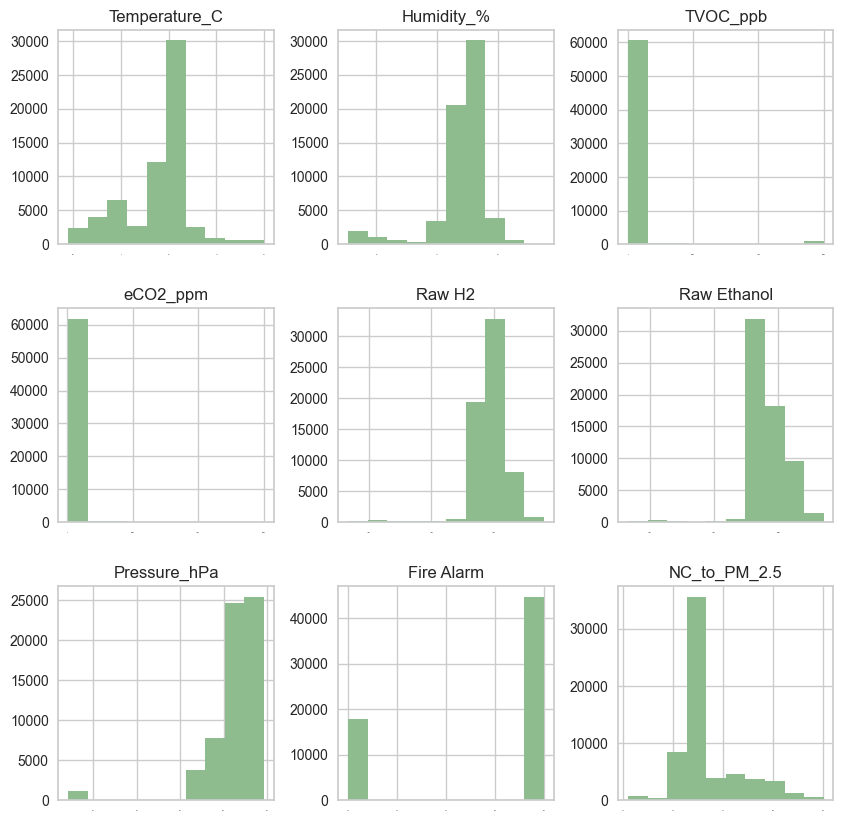

In [126]:
df.hist(bins=10, xlabelsize = 0.1, figsize = (10, 10), color='darkseagreen')

In [127]:
X = df.drop('Fire Alarm', axis=1)

In [128]:
y = df['Fire Alarm']

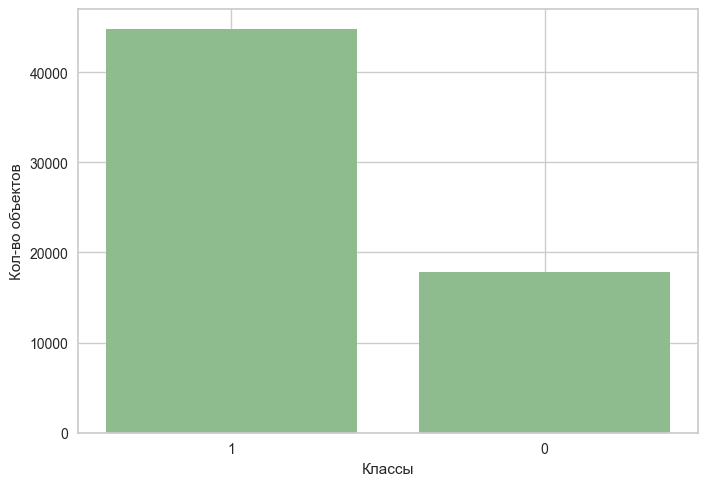

In [129]:
classes = y.value_counts().index.astype(str)
num_of_objects = y.value_counts()

plt.bar(classes, num_of_objects, color='darkseagreen')
plt.xlabel('Классы')
plt.ylabel('Кол-во объектов')
plt.show()

In [130]:
sc = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pandas_columns = X_train.columns
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=pandas_columns)
X_test = pd.DataFrame(X_test, columns=pandas_columns)

In [131]:
reg = LogisticRegression()
model = reg.fit(X_train, y_train)

In [132]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3600
           1       0.93      0.95      0.94      8926

    accuracy                           0.92     12526
   macro avg       0.90      0.89      0.90     12526
weighted avg       0.92      0.92      0.92     12526



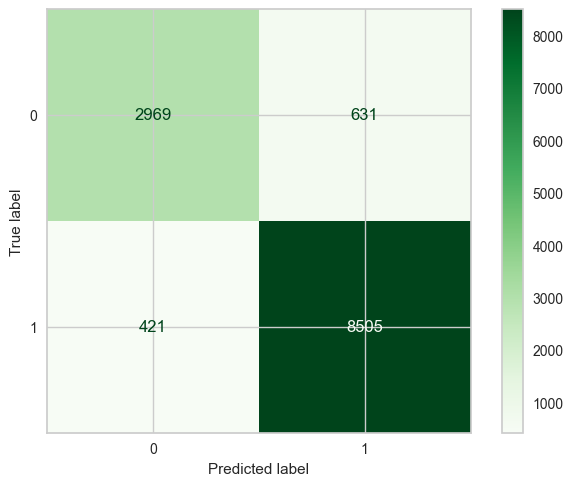

In [133]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


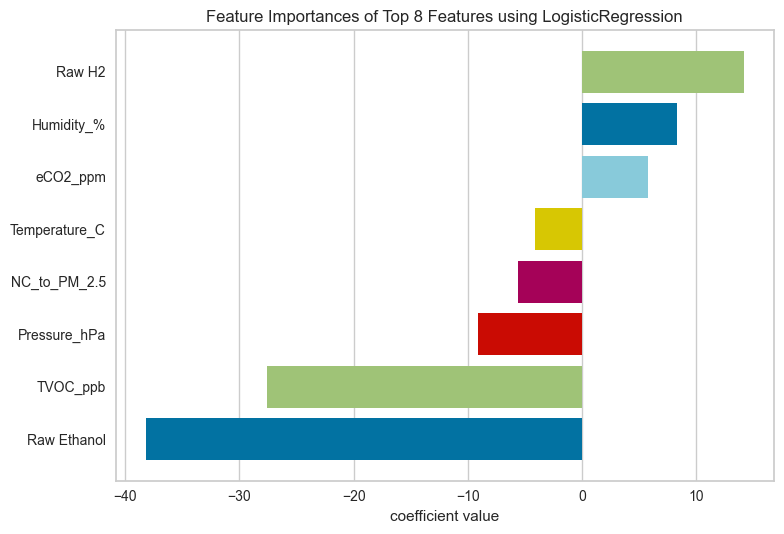

<Axes: title={'center': 'Feature Importances of Top 8 Features using LogisticRegression'}, xlabel='coefficient value'>

In [135]:
viz0 = FeatureImportances(model, topn=8, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

In [136]:
param_grid = {'penalty': ['l2'], 'C': [0.1, 1, 10, 100], 'class_weight': [None, 'balanced', {0: 1, 1: 10}]}

grid_search = GridSearchCV(estimator=model, 
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv=5,
                           error_score='raise'
                           )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced', {0: 1, 1: 10}],
                         'penalty': ['l2']},
             scoring='accuracy')

In [137]:
best_model = grid_search.best_estimator_

In [138]:
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3600
           1       0.98      0.91      0.94      8926

    accuracy                           0.92     12526
   macro avg       0.90      0.93      0.91     12526
weighted avg       0.93      0.92      0.93     12526



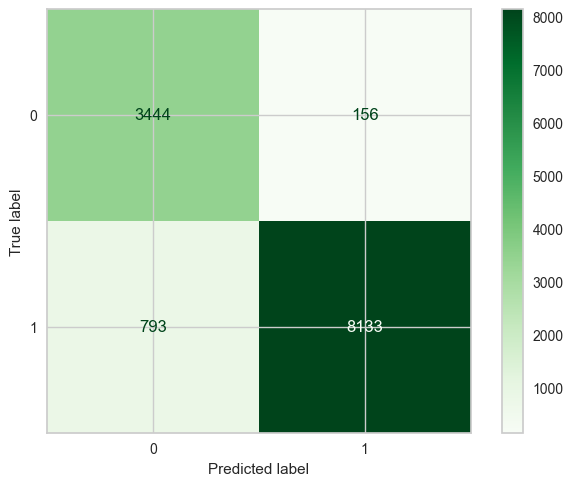

In [139]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


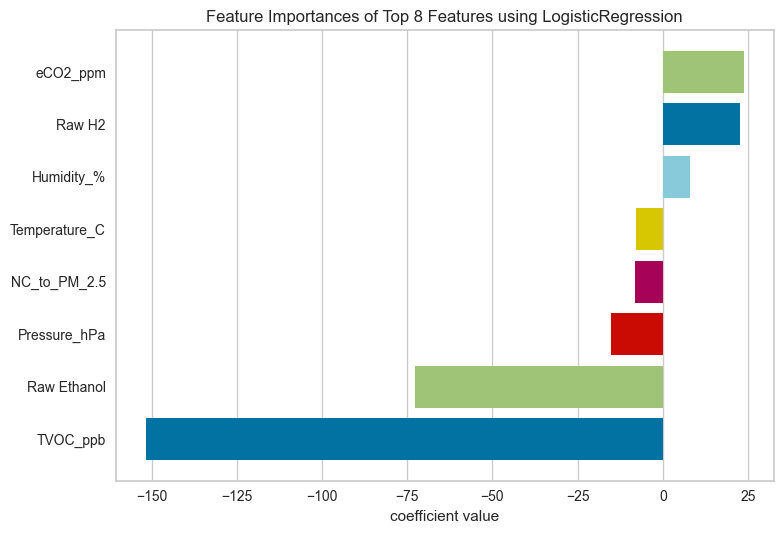

<Axes: title={'center': 'Feature Importances of Top 8 Features using LogisticRegression'}, xlabel='coefficient value'>

In [141]:
viz0 = FeatureImportances(best_model, topn=8, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

In [142]:
lgbm = LGBMClassifier(class_weight='balanced', max_depth=-1, n_jobs=4, num_iterations = 100)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35831, number of negative: 14271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 50102, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00      8926

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



Построим confusion matrix просто чтобы порадоваться :)

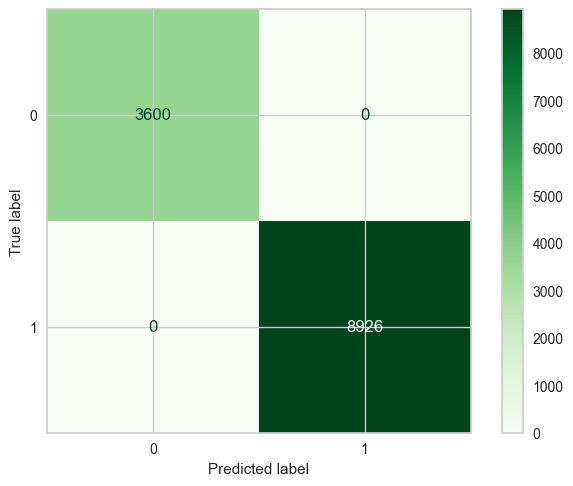

In [144]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


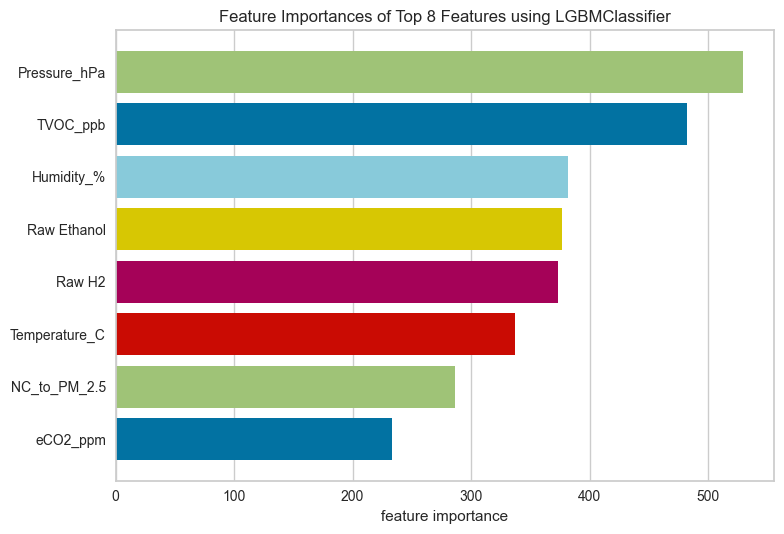

<Axes: title={'center': 'Feature Importances of Top 8 Features using LGBMClassifier'}, xlabel='feature importance'>

In [147]:
viz0 = FeatureImportances(lgbm, topn=8, relative=False)
viz0.fit(X_train, y_train)
viz0.show()

Казалось бы, куда уж лучше. Но нет предела совершенству! Делаем подбор гиперпараметров

In [148]:
param_distributions ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                    'num_leaves': range(5, 20), 
                    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}

new_lgbm = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_distributions, 
    scoring='accuracy',
    cv=3)

new_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23887, number of negative: 9514
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 33401, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(class_weight='balanced', n_jobs=4,
                                            num_iterations=100),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': range(5, 20)},
                   scoring='accuracy')

In [149]:
y_pred = new_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00      8926

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



Здесь уже не буду выводить confusion matrix, там ничего не изменилось

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


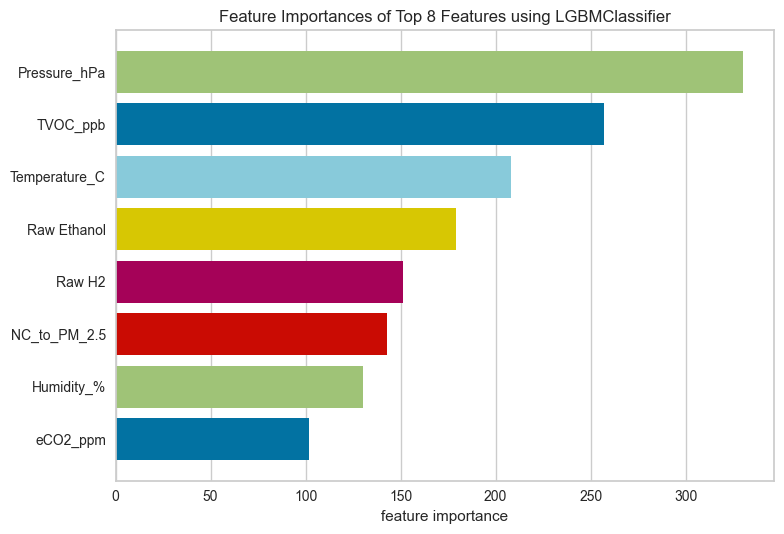

<Axes: title={'center': 'Feature Importances of Top 8 Features using LGBMClassifier'}, xlabel='feature importance'>

In [150]:
best_lgbm = new_lgbm.best_estimator_

viz0 = FeatureImportances(best_lgbm, topn=8, relative=False)
viz0.fit(X_train, y_train)
viz0.show()